In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# EDA 해야할 리스트 7가지

1. 데이터 이해 -> 홈페이지, 딥터디에 기록함
2. 요약 통계 : dsecribe, boxplot 쓰자
3. 시각화 : 여러개 해보자
4. 상관 관계 탐색 : corrlation 그래프 그려봦
5. 이상치 탐색 : 박스 플롯으로 한 번 확인해보자
6. 결측치 처리 : 이 데이터에는 크게 상관없음
7. 가설 수립 : 다 해보고 결론 내보자

In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Kaggle_dataset/위스콘신 데이터셋/data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# 일단 학습 시켜야 하니 object 타입을 바꿔주려 한다.
- 양성 종양은 없음 의미의 0
- 악성 종양은 있음 의미의 1
>> 다음과 같이 설정하겠다.

In [6]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B':0})
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### 캐글에서 제공하는 데이터셋 설명에서 악성 개수가 212개라고 하니 확인차 출력해본다.


In [7]:
count = df['diagnosis'].value_counts()[1]
print(count)

212


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## 모두 숫자형태인걸 알 수 있다

>> -> 추가적으로 Unnamed는 과감하게 쓸모 없는 정보니 삭제한다
--> 이유 : 공개의학용 데이터라서 환자 개인정보가 등장할 수 없기 때문 그냥 삭제해도 무방

In [9]:
df.drop('Unnamed: 32' , axis=1 ,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### 전체가 깔끔하게 정리됐다 이제 시각화를 해보자
--> 사실 그냥 바로 모든 피쳐가지고 모델 돌려도 될 것 같다. 이 데이터 가지고 유의미한 시각화를 할 수 있을지 모르겠다

In [10]:
df.head(100)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,25.38,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,24.99,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,23.57,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,14.91,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,1,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,22.54,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,86208,1,20.260,23.03,132.40,1264.0,0.09078,0.13130,0.146500,0.086830,...,24.22,31.59,156.10,1750.0,0.1190,0.35390,0.40980,0.15730,0.3689,0.08368
96,86211,0,12.180,17.84,77.79,451.1,0.10450,0.07057,0.024900,0.029410,...,12.83,20.92,82.14,495.2,0.1140,0.09358,0.04980,0.05882,0.2227,0.07376
97,862261,0,9.787,19.94,62.11,294.5,0.10240,0.05301,0.006829,0.007937,...,10.92,26.29,68.81,366.1,0.1316,0.09473,0.02049,0.02381,0.1934,0.08988
98,862485,0,11.600,12.84,74.34,412.6,0.08983,0.07525,0.041960,0.033500,...,13.06,17.16,82.96,512.5,0.1431,0.18510,0.19220,0.08449,0.2772,0.08756


In [11]:
df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# 각 열(피쳐)의 데이터 분포를 볼 수 있는 히스토그램을 써봤다

## 의미 : 눈금에 해당하는 데이터 값들의 갯수를 알 수 있다.
- EX) diagnosis 는 0과 1로 이루어져 있으니 0의 개수와 1의 개수 차이를 한눈에 볼 수 있다. 나머지 그래프도 그런식으로 보면 된다.



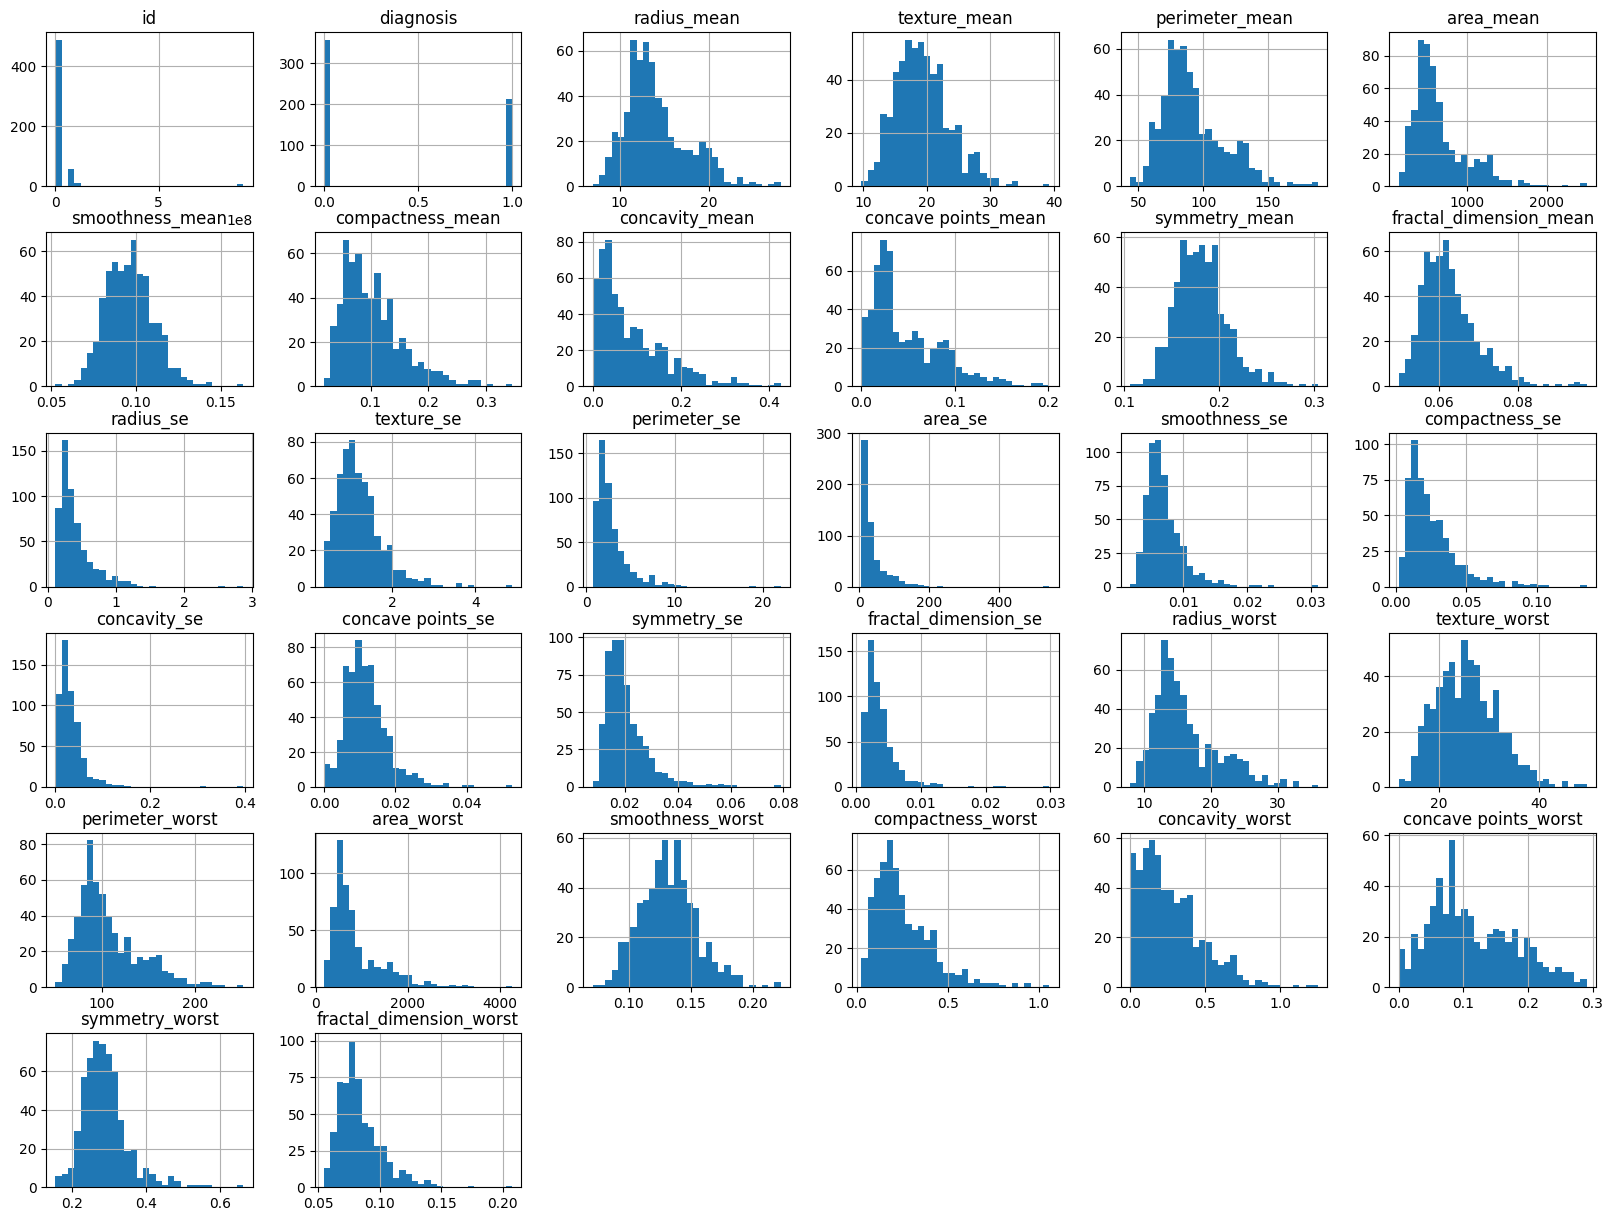

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(bins=30, figsize=(20,15))
plt.show()

# 상관관계 시각화를 해보자

Text(0.5, 1.0, 'Correlation')

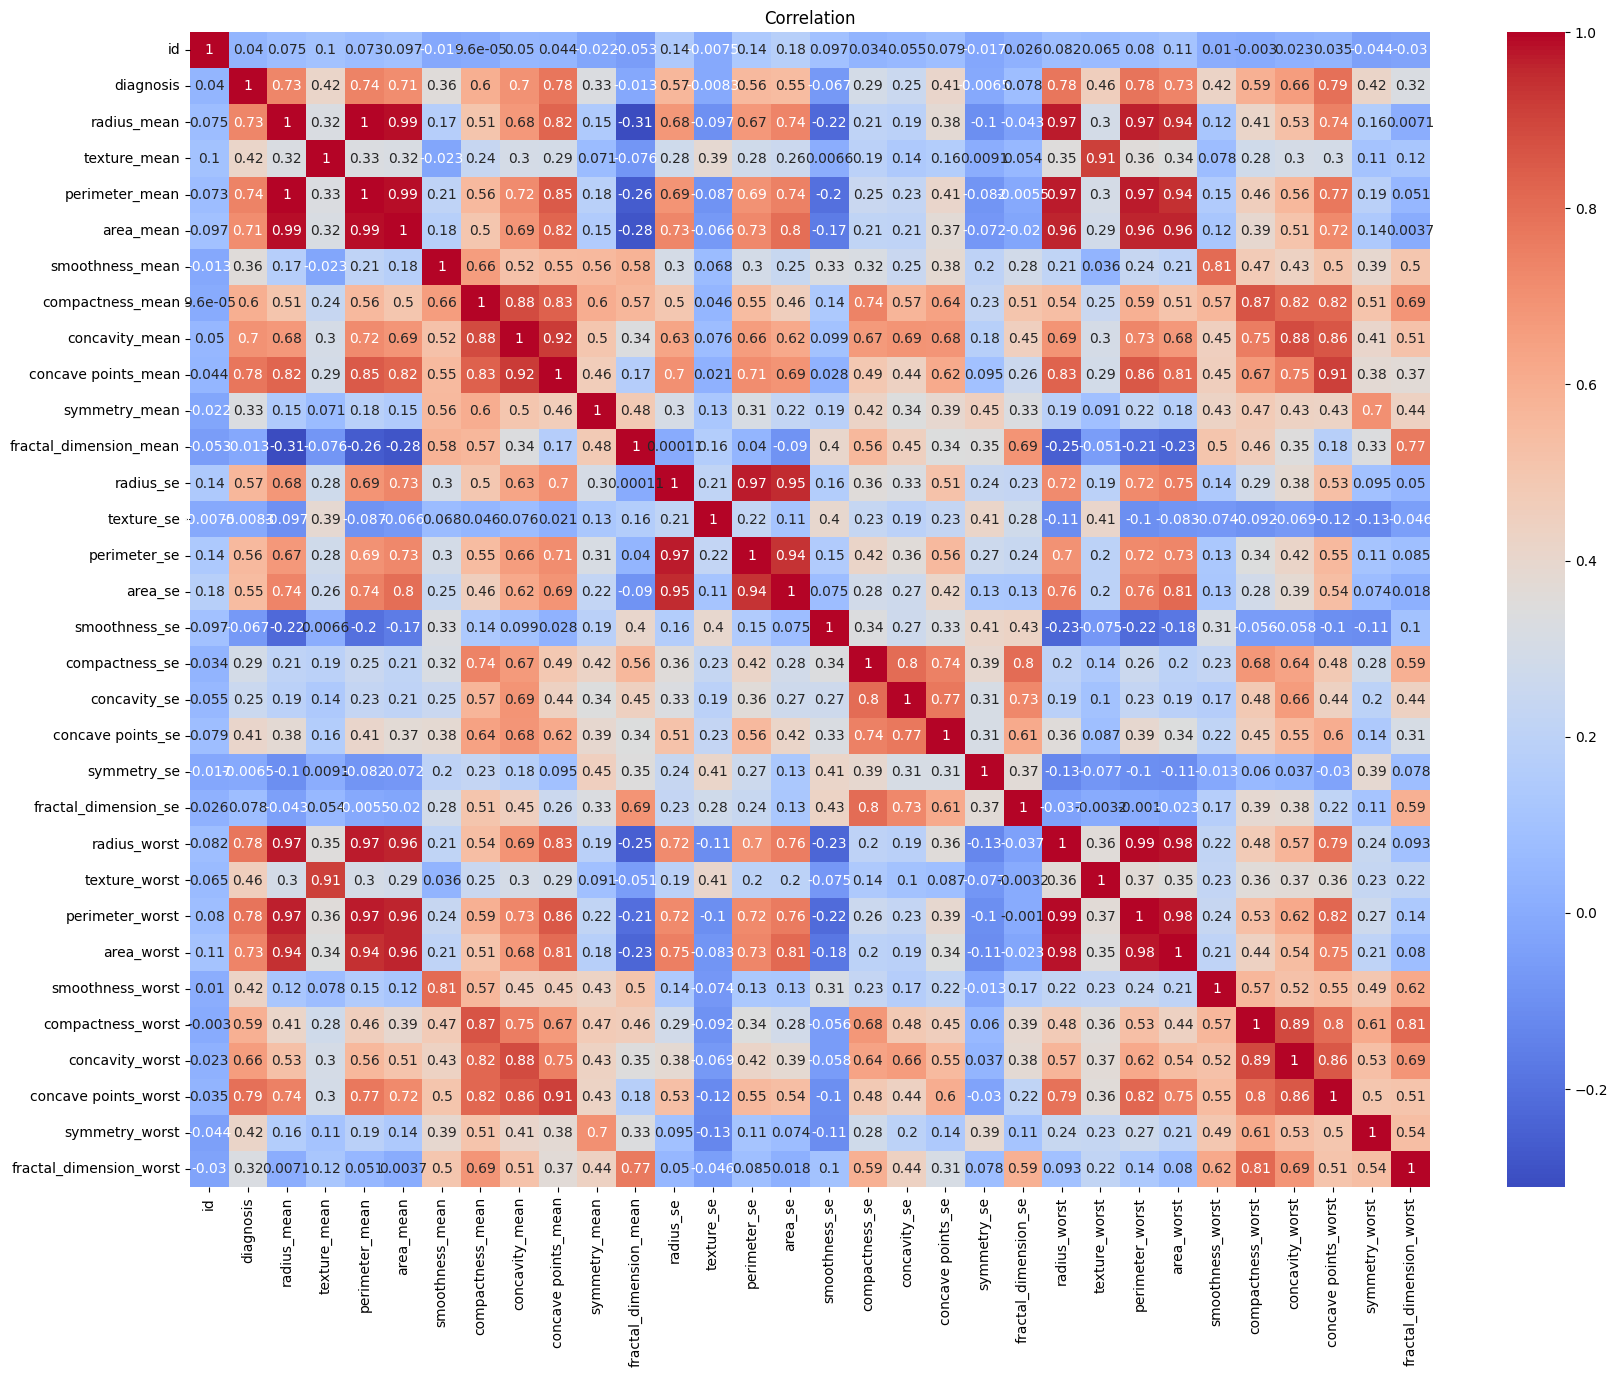

In [13]:
cor = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(cor , annot=True, cmap='coolwarm')
plt.title('Correlation')

# 이게 의미가 있나? => 내가 알고 싶은건 악성, 종양과 관계있는 피쳐를 찾아내는거 아닐까
# 상관관계 정의를 살펴보자
    양의 상관관계 (Positive Correlation):

    두 변수가 함께 증가하거나 함께 감소하는 경향이 있습니다.
    상관계수가 1에 가까울수록 강한 양의 상관관계가 있음을 나타냅니다.
    음의 상관관계 (Negative Correlation):

    한 변수가 증가하면 다른 변수는 감소하는 경향이 있습니다.
    상관계수가 -1에 가까울수록 강한 음의 상관관계가 있음을 나타냅니다.
    무상관 (No Correlation 또는 Zero Correlation):

    두 변수 간에 선형적인 관계가 거의 없습니다.
    상관계수가 0에 가까울수록 무상관이나 약한 상관관계가 있음을 나타냅니다.
## 아 그럼 diagnosis 만 남기면?


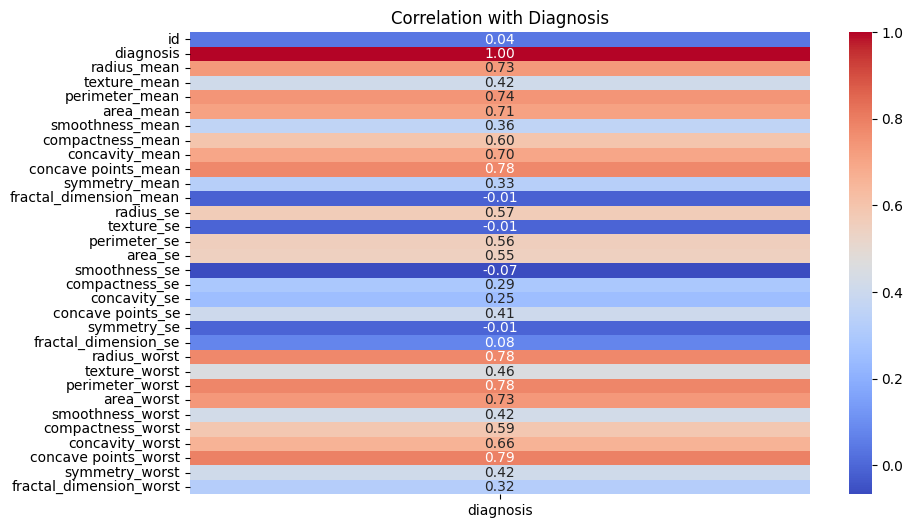

In [35]:
correlation_matrix = df.corr()
# 상관 행렬 계산
diagnosis_correlation = correlation_matrix['diagnosis']
# 'diagnosis' 열과의 상관관계만 선택


# 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(diagnosis_correlation.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with Diagnosis')
plt.show()

- ### 볼 수 있는 것 : SE값은 0에 가까우니 가운데 10개 특성은 보지 않고, 사실상 mean와 worst의 값은 동일하다고 볼 수 있다. 그러니 mean 10개만 확인해보자
- ### smoothness와 texture, symmetrty 제외 나머지 1에 가까움

# 시각화 또 뭐해보지? -> 다른 시각화가 뭐가 있지? -> pairplot이 있다.
    1. 다변량 분석: 여러 변수가 있을때
    2. 변수 간의 패턴 파악
    3. 클래스 구분 --> 이거하려고 써봤다.
    4. 빠른 데이터 탐색
    pairplot은 보통 모든 변수간의 관계를 한번의 시각화 할 때 사용된다.
### 그렇다고 한다.

In [14]:
# mean 변수들로 pairplot 그리기
sns.pairplot(df, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean',
       'compactness_mean', 'perimeter_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'])
#

Output hidden; open in https://colab.research.google.com to view.

### 확인 : 이렇게 보니 악성,양성에 따라 데이터 분포가 분류될 수 있을 가능성이 높다는걸 알 수 있다. -> 바로 모델학습하러 가자
-> 이러한 분포를 다중공선성이라 하니 한 번 확인해보자
--> 나도 뭔소린지 모르겠다 일단 회귀모델은 못쓴다는점
### 하나 더 해야한다. 이상치를 확인해야 한다. 박스플롯이 제격이니 써보자


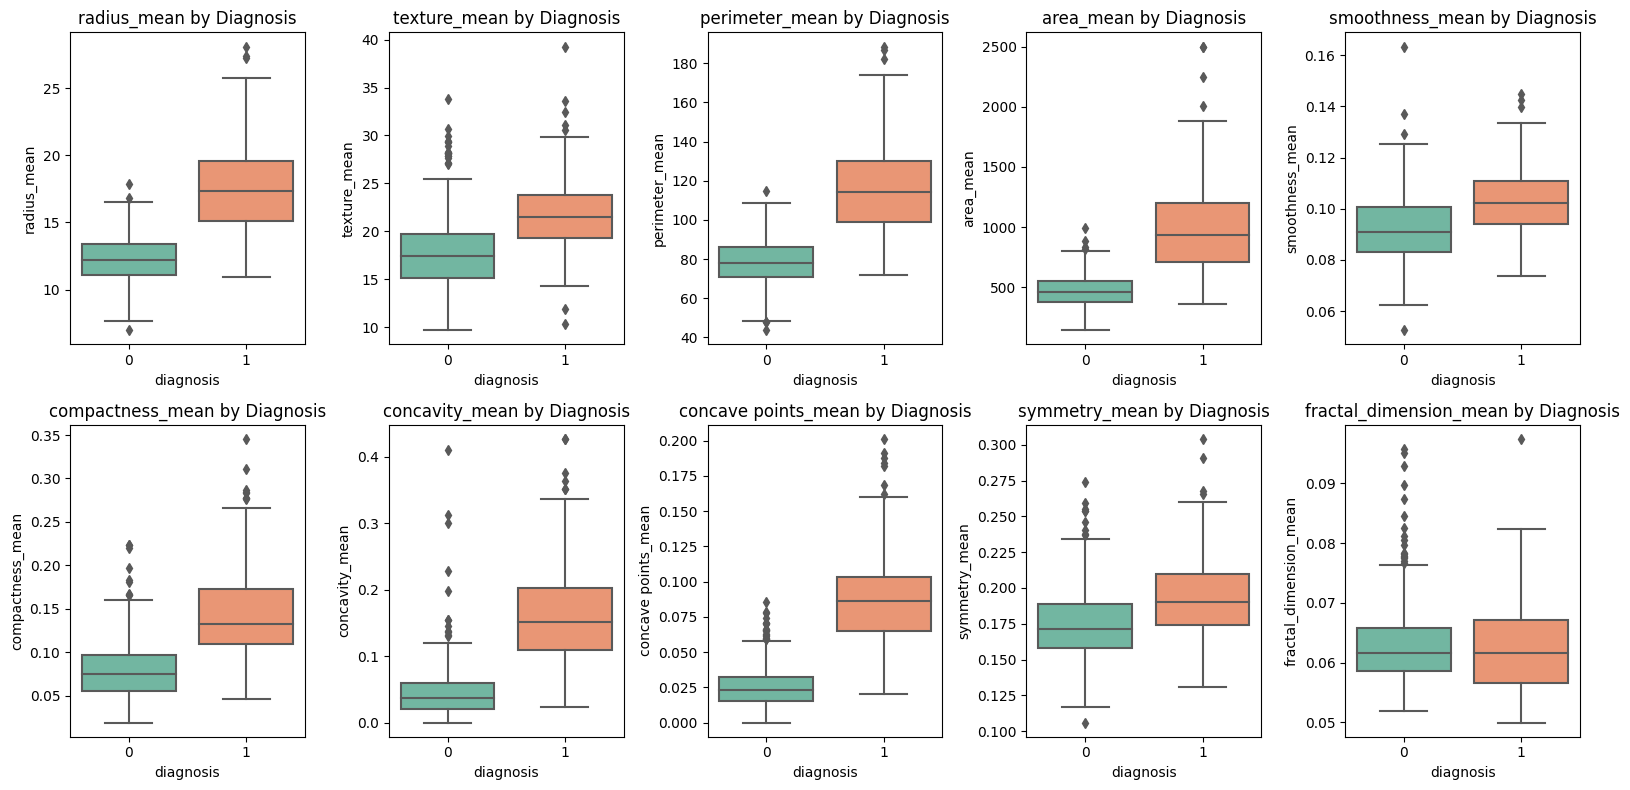

In [19]:
# 'mean'으로 끝나는 특성 선택
mean_columns = df.filter(like='_mean')

# 'diagnosis' 열을 기준으로 여러 특성에 대한 박스플롯 그리기
plt.figure(figsize=(16, 8))
for i, column in enumerate(mean_columns.columns):
    plt.subplot(2, 5, i + 1)
    sns.boxplot(x='diagnosis', y=column, data=df, palette='Set2')
    plt.title(f'{column} by Diagnosis')

plt.tight_layout()
plt.show()

## 이상치가 존재한다. -> 확인 -> 하지만 난 조정 안 할 것
## 추가로 -> 정규화 할 것인가? -> 안 함 -> 결정트리 사용할 거임

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [21]:
# 종속 변수와 독립 변수 분리
X = df.drop(['diagnosis', 'id'], axis=1)  # 불필요한 열 제거
y = df['diagnosis']

# 학습 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 결정 트리 모델 생성 및 학습
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)

Accuracy: 0.9474

Confusion Matrix:
[[68  3]
 [ 3 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

